#  PROBLEMA ENUNCIADO Y LA EMPRESA ANALIZADA 

Este Proyecto va a tratar de predecir que empleados de una compañia es mas probable que dejen la empresa o se busquen otro trabajo, localizaremos los potenciales candidatos a abandonar la empresa incluso el porque dejan la empresa, lo que les motiva a abandonar el puesto de trabajo. \
Se construirá un modelo que nos pueda decir algo acerca de cuales son las caracteristicas a tener en cuenta y que favorezcan a que un potencial candidato abandone el trabajo. 

### ¿Que queremos hacer en nuestra empresa? 
En cualquier empresa siempre hay un lider, manager, uno de los retos de estos es saber a quienes contratan y quien vale la pena retener a largo plazo. \
Si se eligen a las personas incorrectas para la empresa, esto podría costar dinero y mucho tiempo. \
Se debe de ser muy selecto, tener un proceso riguroso de contratación, este proceso riguroso para intentar conseguir a los mejores candidatos que trabajen con el manager, pasa por un desembolso económico enorme, el proceso de contratacion es sumamente costoso, muchas veces queremos reducir los costos para estas empresas. \
Objetivo : Buscar un buen candidato.  \
tambien hay que considerar que se debe de reducir la cantidad de tiempo. 
* Contratar y retener empleados son tareas extremedamente complejas que requieren capital, tiempo y habilidades. 
* Los propietarios de pequeñas empresas dedican el 40% de su jornada laboral a tareas que no ingresos como la contratación. 
* Las empresas gastan entre el 15%  y el 20% del salario del empleado para contratar un nuevo candidato. 
* Una empresa promedio pierden entre el 1% y el 2,5% de sus ingresos totales en el tiempo que lleva poner al día a un nuevo empleado. 
* Contratar a un nuevo empleado cuesta un promedio de 7645 (empresa de entre 0 y 500 empleados).
* En promedio se necesitan 52 días para cubrir un puesto. 
La idea es: 
* Trabajo como cientifico de datos en una corporación multinacional. 
* El equipo de recursos humanos recopilo una gran cantidad de datos sobre sus empleados y se acerca a mi para desarrollar un modelo que pudiera predecir que empleados tienen mas probabilidades de renunciar. 
* El equipo nos ha proporcionado una gran cantidad de datos, aqui hay una muestra del conjunto de datos: \
Participación laboral  \
Educación  \
Satisfacción laboral  \
Clasificación de Rendimiento  \
Satisfacción en las relaciones  \
Equilibrio trabajo-vida 

# IMPORTAR LAS LIBRERIAS Y LOS DATASETS

In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
employee_df = pd.read_csv("C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/SECCION 2 - DEPARTAMENTO DE RECURSOS HUMANOS/Human_Resources.csv")

In [129]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Tenemos un Dataframe que nos resume variables tales como: 
* Con 1470 filas y 35 columnas o caracteristicas que describen a los empleados. 
* Edad, una edad podría ser determinante, pues los empleados mayores se sienten mas comodos con el trabajo que ya saben hacer,es poco probable que puedan dejar la empresa. 
* BussinessTravel, que tran frecuente o que rara vez viajan. 
* DailyRate, los ingresos que generan diaramente. 
* DistanceFromHome, la distancia que ocupa entre el trabajo y la casa, esta tambien puede afectar la tendencia de si se queda o se marcha. 
* Education, cuanto mas alto, mayor nivel de educacion. 
* EnvirommenteSatisfaction, satisfacción del empleado por su trabajo. 
* JobInvolment, la involucración en su trabajo. 
* JobSatisfaction, satisfacción con el trabajo que realizan. 
* NumCompaniesWorkef, numero de trabajos anteriores. 
* MaritalStatus, se podría pensar que una persona soltera, es mas propensa a irse.
* Overtime, otro factor importante, si se llevan el trabajo a casa. 
* PerformanceRating, factor a tener en cuenta. 


In [130]:
#A continuación tomaremos el dataset, usando ciertas funciones para investigar un poco mas acerca del dataset. 
employee_df.describe() #resumen estadístico. 

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [131]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

¿Cuantas variables hay de tipo entero de 64 bytes?
* El Dtype nos indica enteros de 64 bytes, nos dice que hay 26 variables numericas. \
¿Edad Promedio de los empleados?  
* casi de 37 años. 
* El empleado mas joven tiene 18 años y el mas grande tiene 60 años, el 50% tiene a lo mas 63 años y el otro 50% tiene mas de 36. 
* Diariamente ganan un promedio de 800 dolares. 
* El promedio es de 9km de distancia desde casa. 


# EXPLORAR EL DATASET

Serie de gráficos que nos permiten entender mejor, como estan distribuidas las personas de esta empresa. \
Transformaremos algunas columnas, como la variable Attrition,Over19 y OverTime cambiaremos a valores 0 o 1. 


In [132]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Yes' else 0) 
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Y' else 0) 

In [133]:
employee_df.head(4)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  

[4 rows x 35 columns]

veremos si hay valores NA, con un grafico de seaborn. 

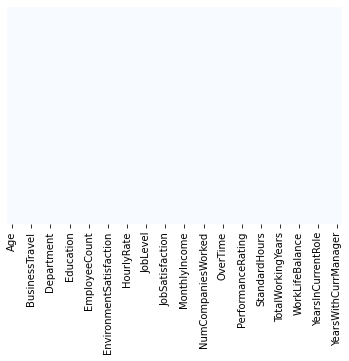

In [40]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap="Blues") 
#para cada una de las columnas preguntanmos si hay o no elementos nulos. 

No hay ningun dato NA, esto quiere decir que todos los datos del dataset estan completos. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000131262D9F40>,
      dtype=object)

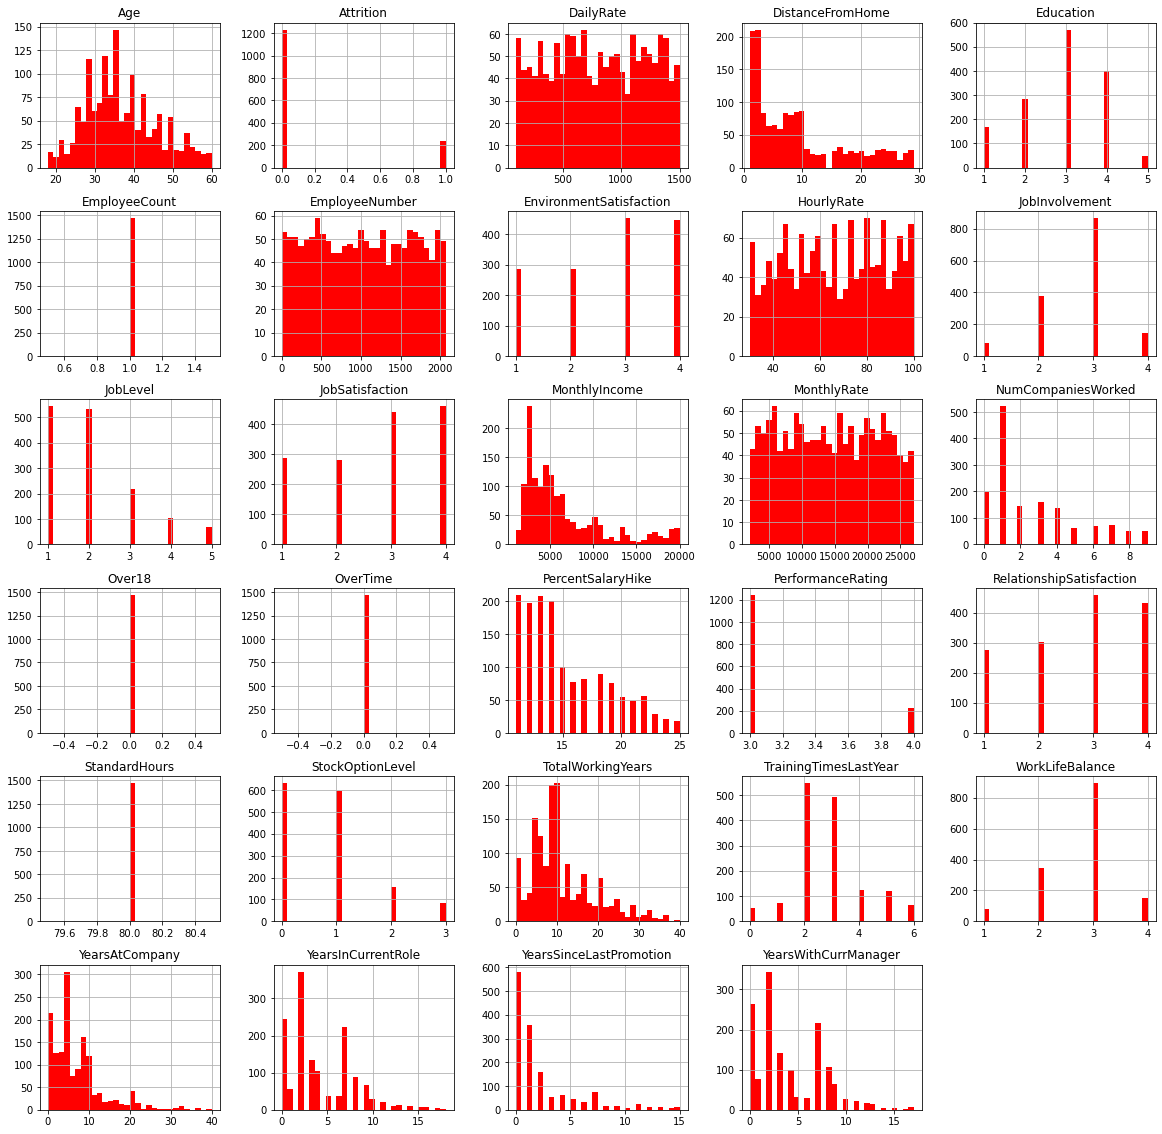

In [41]:
#Representaremos un histograma con las caracteristicas de nuestro dataframe, como se distribuyen cada una de las variables del 
#dataframe. 
employee_df.hist(bins = 30, figsize=(20,20), color = 'r')

* Vemos que la gran mayoría de los empleados se encuentran entre los 30 y 40 años de edad. 
* El campo Attrition nos dice que de los 1500 empleados unos 80% no abandonan la empresa, se quedan. 
* La gran mayoria vive cerca del trabajo. 
* La mayoria deberia tener una carrera universitaria, pocos un doctorado o cierto grado superior. 
* Numero de años en la empresa, casi la gran mayoria lleva 10 años trabajando.\
Esta es la visión general de los datos. \
Ahora quitaremos esas variables que no son muy utiles para el modelo, que son constantes.\
Tiene sentido deshacerse de EmployeeCount, Standardhours, Over18, EmployeeNumber.

In [134]:
employee_df.drop(["EmployeeCount","StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

In [135]:
employee_df.head() #ya tenemos 31 variables. sobreescribiendo el propio objeto. 

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

Ahora lo que haremos es:\
Intentar saber ¿Cuántos empleados dejan la compañia y cuántos se quedan en la empresa?\
para ellos crearemos dos dataset, apartir del original. 

In [123]:
left_df = employee_df[employee_df['Attrition'] == 1] #nos quedamos con las filas que se corresponden al campo attrition=1
stayed_df =  employee_df[employee_df['Attrition'] == 0] 

In [45]:
#Contamos el numero de empleados que se quedaron y se que fueron 
print("Total = ", len(employee_df))

print("Numero de empleados que dejan la empresa = ", len(left_df))

print("Porcentaje de empleados que dejan la empresa =", 1.*len(left_df)/len(employee_df)*100.0, '%')

print("Numero de empleados que permanecen en la empresa = ", len(stayed_df))

print("Porcentaje de empleados que permanencen en la empresa =", 1.*len(stayed_df)/len(employee_df)*100.0, '%')

Total =  1470
Numero de empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa = 16.122448979591837 %
Numero de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que permanencen en la empresa = 83.87755102040816 %


Se marchan en torno al 16% de los empleados y se quedan aproximadamente el 83% de los empleados.

In [46]:
#ya tenemos descrito cual es el panorama general de esta empresa. 
#ahora queremos ver como son los empleados que se quedan o se marchan . 
left_df.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count       237.000000  ...         237.000000                237.000000   
mean          2.468354  ...           3.156118                  2.599156   
std           1.118058  ...           0.363735                  1.125437   
min           1.000000  ...           3.000000                  1.000000   
25%           1.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           3.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        237.000000         237.000000             237.000000   
mean           0.527426           8.244726               2.624473   
std            0.856361           7.169204               1.254784   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       237.000000      237.000000          237.000000   
mean          2.658228        5.130802            2.902954   
std           0.816453        5.949984            3.174827   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               237.000000            237.000000  
mean                  1.945148              2.852321  
std                   3.153077              3.143349  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   1.000000              2.000000  
75%                   2.000000              5.000000  
max                  15.000000             14.000000  

[8 rows x 25 columns]

In [47]:
stayed_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1233.000000  ...        1233.000000               1233.000000   
mean          2.778589  ...           3.153285                  2.733982   
std           1.093277  ...           0.360408                  1.071603   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 25 columns]

* Vemos que la edad promedio de los empleados que se marchan esta en torno a los 33 años de edad, con una desviacion estandar 9 años arriba, 9 años abajo, loss que se quedan es entorno a los 37 años de edad, esto es interesante, pues mientas mas grande es la persona, hay mas probabilidad de que se quede. 
* El DailyRate de los empleados que se marchan es entorno a los 750 dolares, mientras los que se quedan es de 812 dolares, el factor dinero tambien parece jugar en favor de los que se quedan. 
* La distancia a casa, los que se marchan estan entorno a los 10km del trabajo a casa y los que se quedan es 8.9km.
* Los que se quedan estan mas satisfechos con su entorno laboral. 
* StockOptionLevel, los que se van tienen unas acciones entorno a 0.5, estan menos involucrados en la empresa. 


Ahora para verlo mucho mejor, es estudiar las correlaciones que existen entre las variables. 


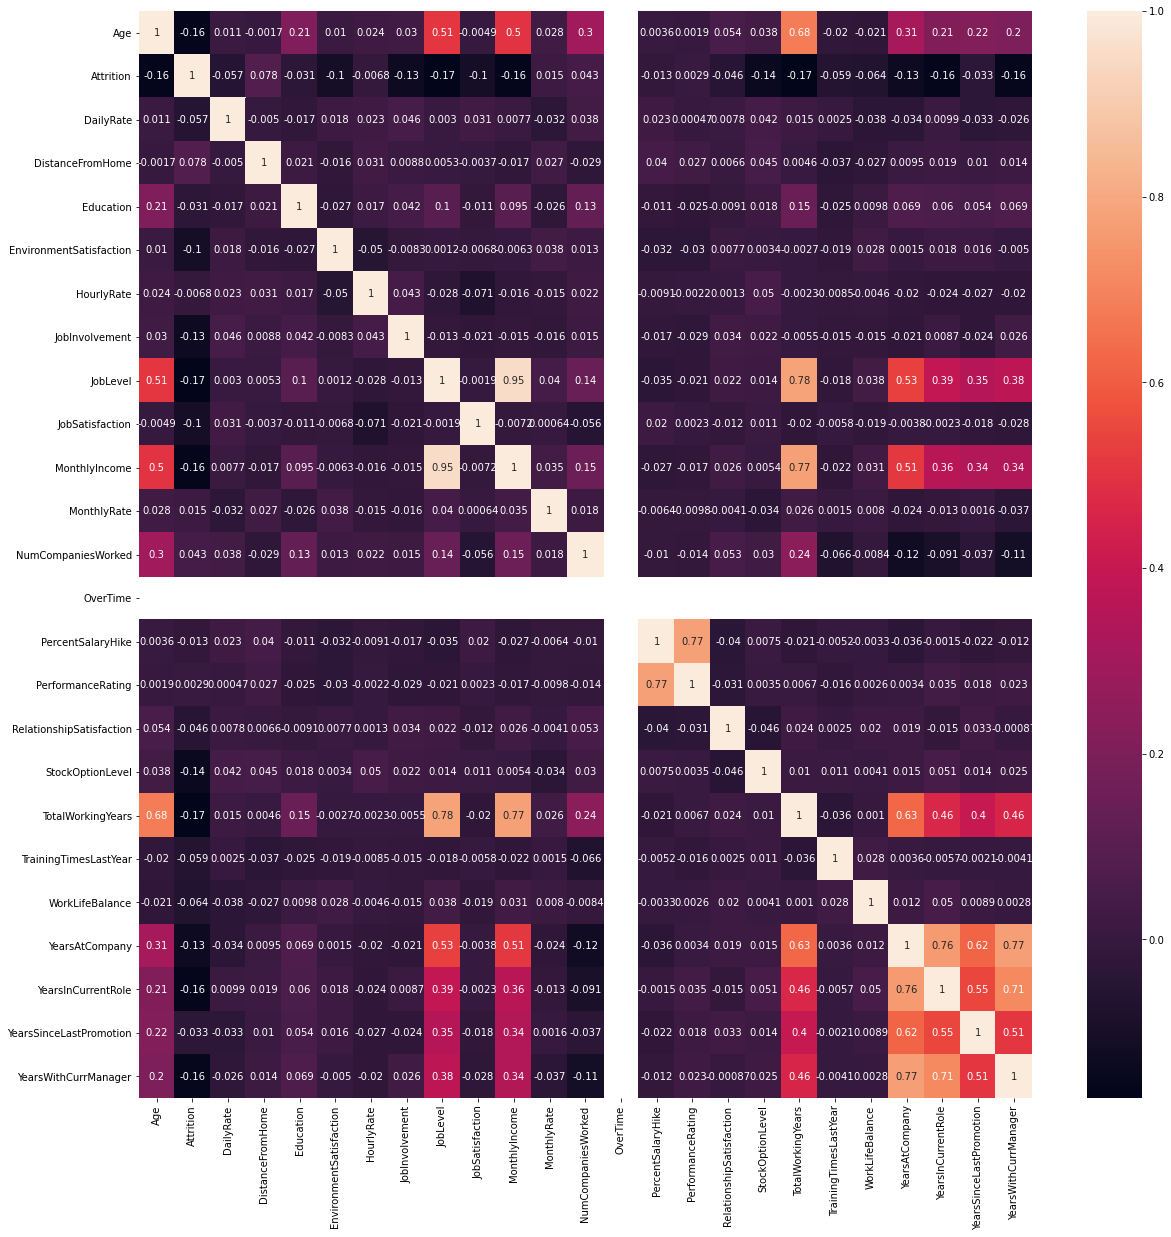

In [48]:
correlations = employee_df.corr()
#usaremos un mapa de calor. 
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

Tenemos la matriz de correlaciones. 
* JobLevel esta muy correlacionado con TotalWorkingYears, cuantos mas años lleva en la empresa, mayor es el cargo de trabajo. 
* TotalWorkinYears correlacionado con MontlyIncome, pues cuantos mas años de experiencia mayor será el sueldo. 
* El cuadrado de lado inferior derecho es bastante vanal con sus resultados, son obvios. 
* La edad esta correlacionado con los años que lleva la persona trabajando.\
Esto ya nos da una mejor idea sobre los usuarios que se marchan, los que se quedan, la correlación entre las variables. 

Compararemos las distribuciones, representaremos las diferentes variables de las que se sospechaba que podian ser candidatas a marcar una tendencia en el abandonar o no la empresa, pintando las distribuciones de las mismas. 

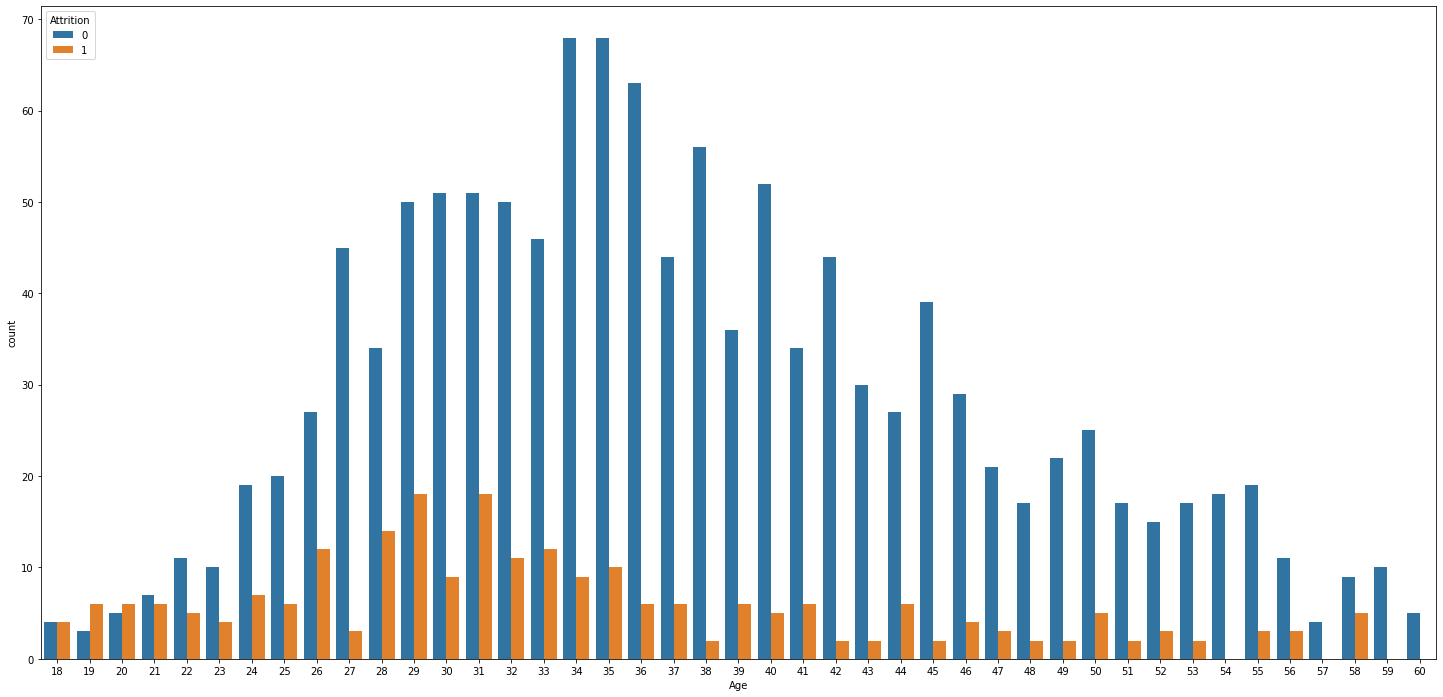

In [49]:
#veremos la representacion de la distribucion de la edad en funcion del campo Attrition.
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df) #el color estan en dependencia de Attrition.

Vemos que el campo de edad, va desde los 18 años hasta los 60 años, de color naranja entorno a los 28 hasta los 32,33 es donde esta el abandono masivo de empleados en esa empresa, aproximadamente a 20 empleados a comparacion de los 50 que se quedan. Entre los 28 y 31 años de edad, hay mas probabilidades que alguien abandone, los mas mayores nadie casi nadie abandona, un factor como la edad puede ser un factor muy importante. 

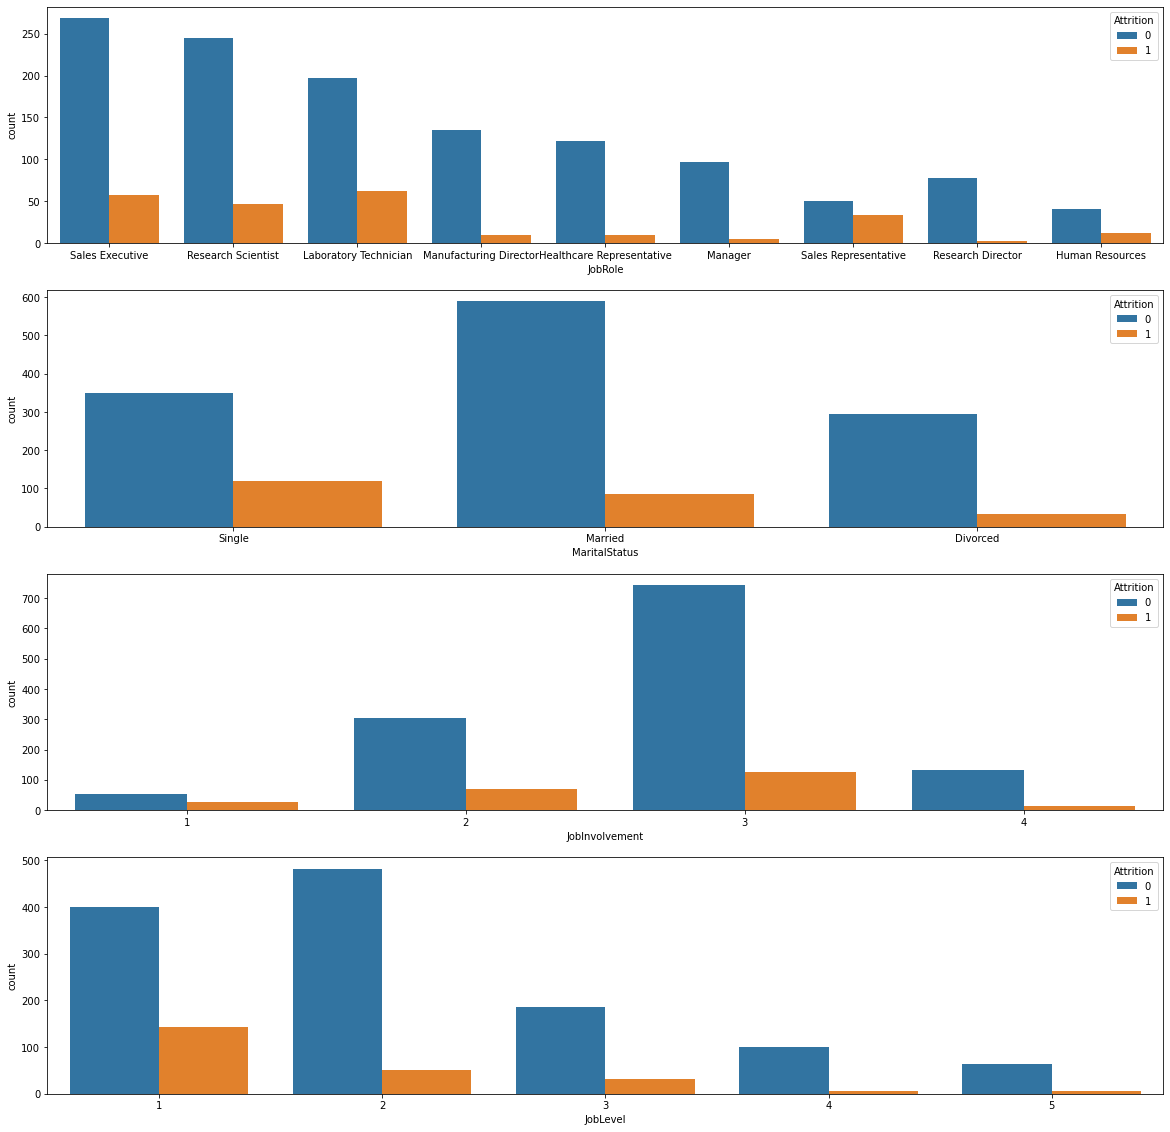

In [50]:
plt.figure(figsize = [20,20])
#4 graficos para cada una de las siguiente variables. 
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)


* 1. De los departamentos de esta empresa, el "departamento de ventas" vemos que se quedan tantos como se van, entorno a poco mas de 50 personas todavia trabajan en ventas, pero como 45 o 40 se han ido, esto es muy elevado, pues nos indica que la mitad de ese departamento abandona la empresa, por algun motivo esos empleados deciden abandonar, puede que sea un trabajo mal pagado, mucho estres, etc. el departamento de "Laboratory Technician" hay muchas personas que abandonan en comparación a los que se quedan, abandonan aprox unos 50 de los 200 que se quedan. De aqui ya nos damos una buena idea de que el departamento de trabajo es imporante para poder discriminar si el empleado se marcha o se queda. 
* 2. El estado marital, podemos observar que los solteros tienen mas tendencia a abandonar que el resto, de unos 350 empleados solteros aprox unos 100 abandonan, porcentaje muy superior respecto a los demas, el ser soltero es un buen indicativo a querer abandonar. 
* 3. Cuanto se involucra la gente en su trabajo, nos dice que la gente que apenas se esta involucrando les da igual quedarse o irse, cuanto mayor es su involucracion vemos que es menos alto el grupo de gente que se marcha. 
* 4. El trabajo que desempeñan cuando el trabajo es de nivel 1, de unos 400, 130 deciden marcharse, cuanto mayor es el nivel de puesto, es menos probable que las personas abandone.\
El estudiar estas tendencias de cuando un empleado abandona una compañia, nos esta dando mucho feedback, nos da cuales podrian ser las razones mas directas. 

Hablaremos ahora de un tipo especial de graficos, los graficos de kerneldensitystimate que sirven para visualizar las densidades de probabilidad, cuando se trata de variables continuas. 

Veremos cuantos empleados se marchan o se quedan en funcion de la distancia que tienen de casa al trabajo. 

Text(0.5, 0, 'Distancia desde casa al trabajo')

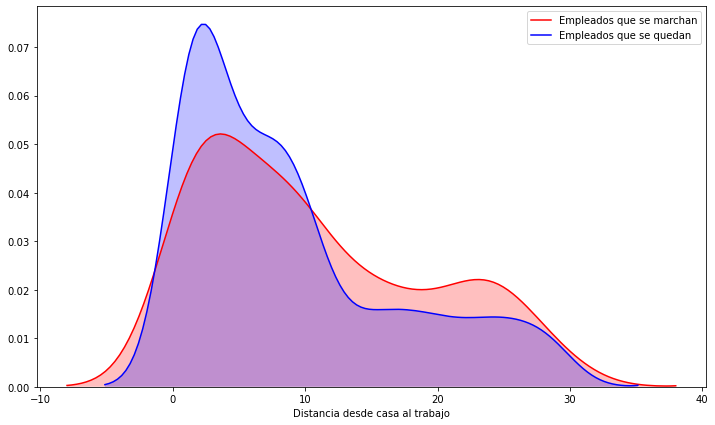

In [51]:
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Empleados que se marchan', shade = True, color = 'r') 
#esta nos va a ayudar mucho para estudiar la distribucion de prob de una variable continua. 
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Empleados que se quedan', shade = True, color = 'b') 

plt.xlabel('Distancia desde casa al trabajo')


Tenemos la distancia de casa al trabajo en el eje de la x, de color rojo la distribucion de los empleados que se marchan de la compañia, azul de los que se quedan en la compañia. 
Esto es una perspectiva del analisis de la densidad de la probablidad, de la densidad estimada.\ 
lo que se debe de entender de aqui es, ¿Que tan probable es que un usuario pertenezca al grupo de entre 0 y 10 km de trabajo, entre 10 y 20 km, etc y ver si es mas probable que se quede o que se marche.\
Podemos observar que la gente que esta algo mas alejada de casa, desde 10 km la distribucion de los que se marchan esta por encia de la azul, por lo tanto puede existir una correlacione entre la variable distancia de casa al trabajo con el hecho de que el empleado se marche o se quede. 

Text(0.5, 0, 'Años con su Manayer Actual')

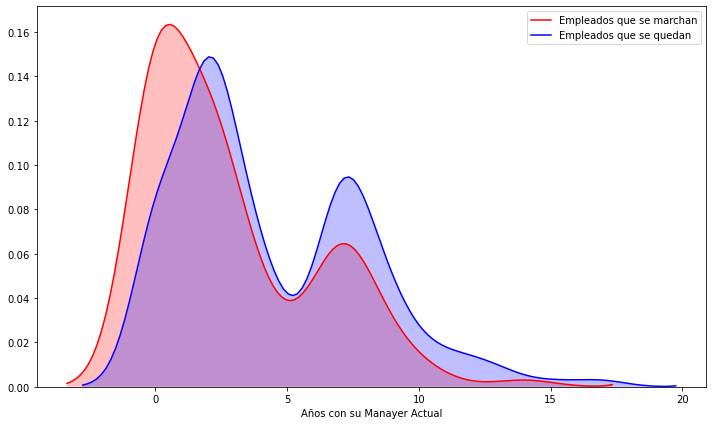

In [52]:
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Empleados que se marchan', shade = True, color = 'r') 
#esta nos va a ayudar mucho para estudiar la distribucion de prob de una variable continua. 
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Empleados que se quedan', shade = True, color = 'b') 

plt.xlabel('Años con su Manayer Actual')


Tenemos que si el numero de años con el manager actual es bajo la curva que destaca es la de color rojo, eso significa que los empleados llevan poco tiempo con un manager, les es mas facil marcharse que no quedarse apegados a esa empresa.\
Hay un punto de inflexión donde de los 5 años en adelante claramente los empleados tienden mucho mas a quedarse en la compañia que no marcharse. 

Text(0.5, 0, 'Numero total de años de Trabajo')

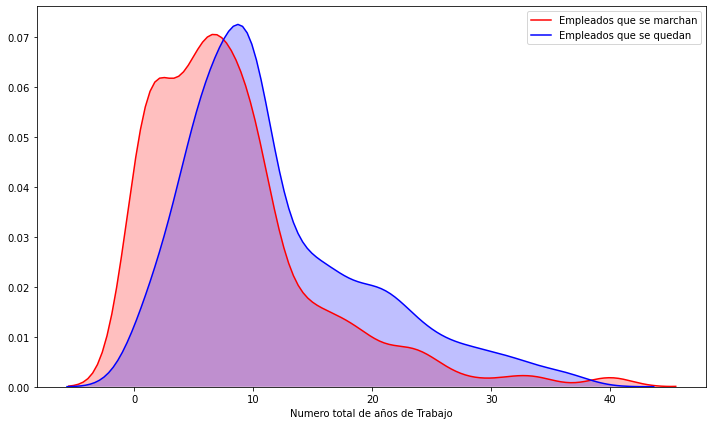

In [53]:
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Empleados que se marchan', shade = True, color = 'r') 
#esta nos va a ayudar mucho para estudiar la distribucion de prob de una variable continua. 
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Empleados que se quedan', shade = True, color = 'b') 

plt.xlabel('Numero total de años de Trabajo')

Haremos ahora una serie de BoxPlots. 

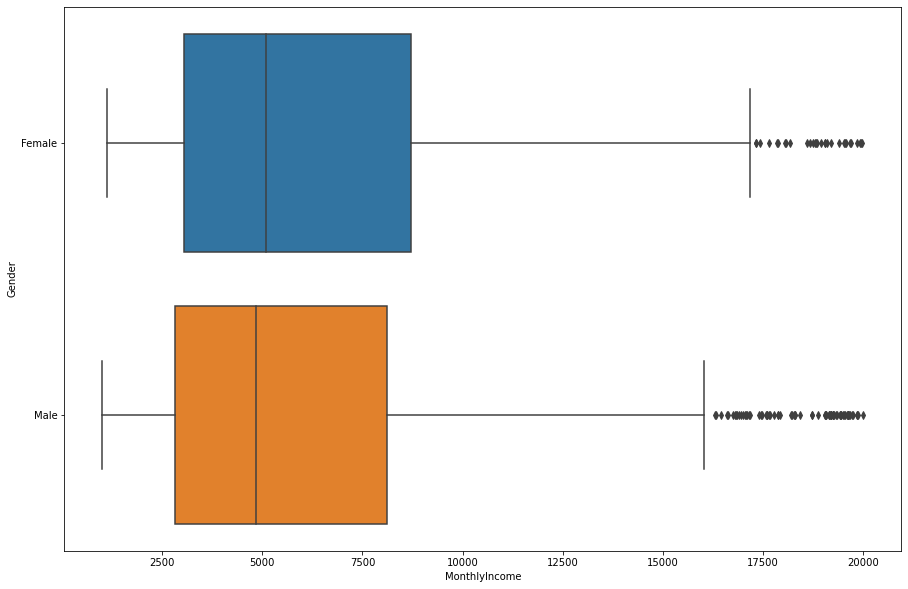

In [54]:
#Veamos el Gender vs Monthly Income 
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y  ='Gender', data = employee_df)

De acuerdo al grafico, en esta empresa podemos garantizar que no hay ningun tipo de desicriminación debido al genero de la persona, el promedio de lo que ganas ambos es casi la misma, incluso la de las mujeres estan mas por encima, si nos fijamos en la caja, el 75% de las mujeres tiene un sueldo que es superior al 75% de los hombres, es que el tercer cuartil, este esta muy por encima.\
Hay outliers, valores que se salen del rango del bigote y llegan a ganar mas dinero.

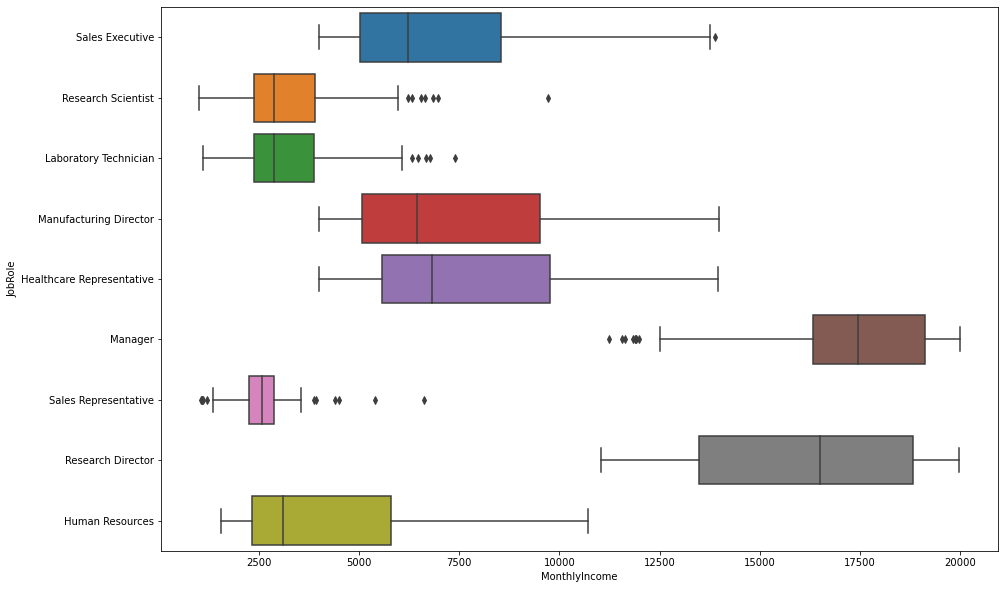

In [55]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y  ='JobRole', data = employee_df)

Aqui podemos observar que la gente que gana mas dinero son los managers, lo cual tiene sentido, por algo son los manager, gente que tiene mayores responsabilidades, tienen una media de 17000 dolares.\
Vemos que los cientificos, tecnicos de laboratorios estan bastantes mal pagados, en comparación al resto de la empresa, los representantes de ventas ganas mucho menos que todos los demas.\
Por tanto se puede ver que los representantes de ventas o tecnicos de laboratorio, son personas peor pagadas, que los directores de investigacion, manager. 


# LIMPIEZA DE DATOS 

Crearemos el conjunto de entrenamiento, el conjunto de test y hacer alguna limpieza en las variables.\
Una vez que sabemos como son estas variables, la tarea siguiente, la numero 4, ira enfocada en hacer un preprocesado y una limpieza antes de poder enchufar los datos a un modelo de inteligencia artifical, machine learning, etc.\
Limpiaremos las variables segun su naturaleza, hay unas que son categoriza y que por tanto, las queremos separar del resto de variables que son numericas. 

In [56]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

Podemos observar que el BussinessTravel es claramente una variable categorica, el departamento, el nivel de educación del trabajador, el genero, el rol que desempeña el trabajo, todos esos son datos categóricos que simplemente sirven para encajetar el usuario, el trabajador, en una categoria u otra, darle una etiqueta, un atributo, las demas es claro que son variables numéricas. 

In [57]:
x_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']] 
#6 campos que es de intetes transformar o estudiar como categorias. 

In [58]:
x_cat #todas son etiquetas o categorias. 

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus  
0               Sales Executive        Single  
1            Research Scientist       Married  
2         Laboratory Technician        Single  
3            Research Scientist       Married  
4         Laboratory Technician       Married  
...                         ...           ...  
1465      Laboratory Technician       Married  
1466  Healthcare Representative       Married  
1467     Manufacturing Director       Married  
1468            Sales Executive       Married  
1469      Laboratory Technician       Married  

[1470 rows x 6 columns]

Todas ellas deben de alguna manera ser suministradas a un modelo de machine learning, lo que pasa es que un modelo no entiende de categorias, sino de numeros, lo que haremos es aplicar una transformación para convertir esta información a ser variable numericas que pueda entender un modelo de IA. 

In [59]:
#para hacer estas transformacion usamos la libreria scikit-learn. 
from sklearn.preprocessing import OneHotEncoder
#ese formato OneHot lo que va a decir, es que va a crear tantas columnas como difererentes categorias haya dentro de una variable
#por ejemplo 
#el genero solo sera separada en dos columnas, si es hombre o mujer. 


In [60]:
onehotencoder = OneHotEncoder() #este objeto es lo que se va a encargar en tranformar esas categorias. 

In [61]:
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [62]:
x_cat.shape #vemos que ahora esta conformada de 1470 entradas y 26 columnas, lo que antes eran 6 ahora son 26.

(1470, 26)

In [63]:
#le haremos una ultima transformacion 
x_cat = pd.DataFrame(x_cat)
x_cat

0    1    2    3    4    5    6    7    8    9   ...   16   17   18  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   

       19   20   21   22   23   24   25  
0     0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1466  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1468  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1469  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1470 rows x 26 columns]

In [64]:
#Vemos que las categorias han quedado codificadas con 0 y 1, lo que significa que hemos podido transformar categorias a numeros. 


In [65]:
#trabajeremos ahora con las numericas. 
x_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
#escribimos ahora todas las variables numericas.
#aqui tambien hemos quitado la columna "Attrition", pues esta es el target, la que queremos predecir. 

In [66]:
x_numerical #todas las variables numericas estan aqui. 

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1465  ...                  3                         3                 1   
1466  ...                  3                         1                 1   
1467  ...                  4                         2                 1   
1468  ...                  3                         4                 0   
1469  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


¿no podemos juntar el dataset?, la idea es que no queremos tener la info duplicada por dos lados diferentes.


In [67]:
x_all = pd.concat([x_cat, x_numerical], axis = 1) #eje de union es axis, 1 es por columnas.

In [68]:
x_all

0    1    2    3    4    5    6    7    8    9  ...  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  
...                    ...  
1465                     3  
1466                     7  
1467                     3  
1468                     8  
1469                     2  

[1470 rows x 50 columns]

Ahora haremos el escalado de los datos con una función, entes de usar modelos de redes neuronales.\
¿Porque necesitamos hacer el escalado de datos?, si no lo hicieramos, hay variables que se mueven entre los valores 1000, pero hay otras que solo se mueven entre valores menores a 100, si dejamos los datos asi, los valores mas grandes tendrán mayor dominio respecto a los demas datos. 

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #este objeto se encargará de hacer la transformación. 
#definimos le conjunto de variables independientes
x = scaler.fit_transform(x_all) #todos los valores ya estan entre 0 y 1. 

In [70]:
x #estas seran las entradas, las variables independientes. 

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

El campo que no hemos añadido es "Attrition", porque es la variable que se quiere predecir. 

In [71]:
#definimos la variable dependiente. 
y = employee_df['Attrition']

In [72]:
y #es 0 o 1, respecto si el usuario se marcha o se queda. 

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Para este proyecto en especifico, se verá un total de 3 modelos distintos. 
## REDES NEURONALES ARTIFICIALES 
* Lo que intenta hacer esto, es imitar lo que ocurre en un cerebro humano. La inteligencia consiste en poner en contacto a un conjunto de neuronas que son capaces de comunicarse con otras neuronas utilizando energía o impulsos electricos, en el caso de las redes neuronales tratamos de replicar ese comportamiento de las neuronas biologicas, pero con una cantidas enorme de matematicas y ecuaciones. 

In [73]:
from IPython.display import Image

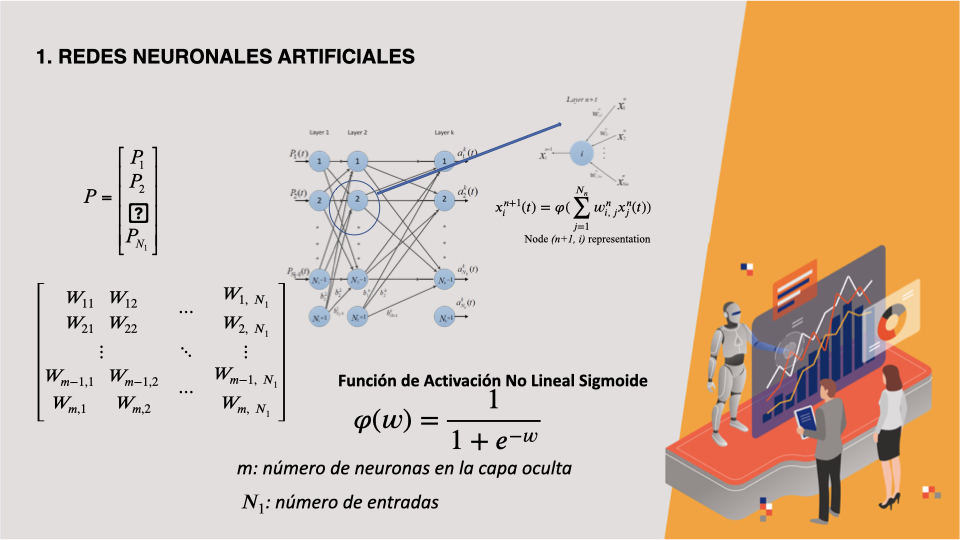

In [74]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.005.jpeg")

Asi basicamente se ve una red neuronal artificial, el tipo de red que se usará aqui es, una red neuronal "de un solo sentido". En medio hay muchas "bolitas" que puede percibir estar conectadas con otras, suele llamarse, red neuronal densa, porque todas estan conectadas con todas, el nombre de red neuronal profunda se debe a que en medio hay una neurona, aunque pueden existir varias. \
  La neurona que se ve del lado superior derecho, tiene muchas entradas, que son las "flechas" que dan hacia el cuerpo de la neurona y una vez ahi, sale un valor de predicción. Cada una de las entradas de una neurona es multiplicada por un peso y esos pesos sirven para capturar la inteligencia, que aporta un conjunto de variables a una neurona. 

## CLASIFICADOR DE REGRESIÓN LOGISTICA 

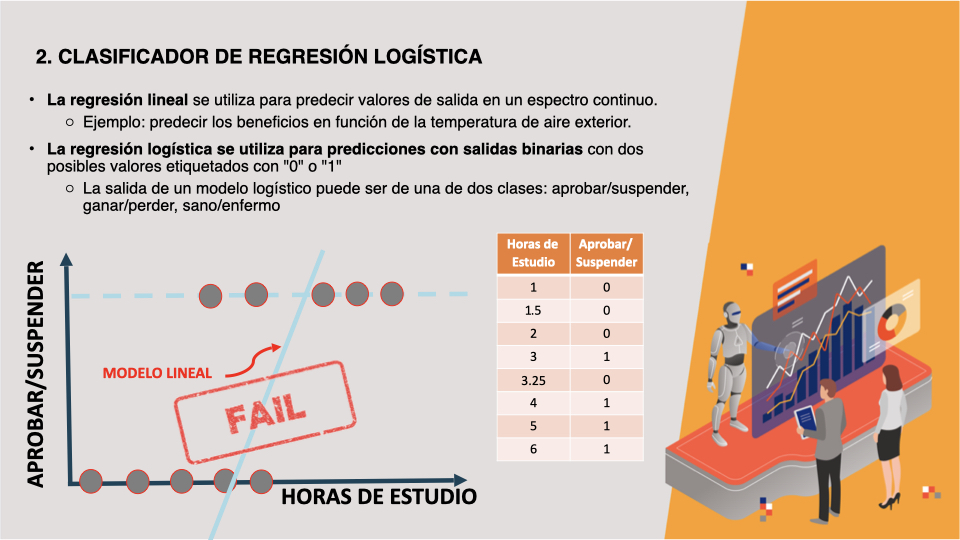

In [75]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.006.jpeg")

La regresión Logistica, es aplicar una regresión pero a una tarea de clasificación, se hace una predicción de un valor, pero se le hace una transformación para que eso termine siendo un proceso de clasificación.\
La idea es tener una serie de puntos y lo que se intenta hacer es predecir cuál es la linea que mejor se ajusta a esos puntos, pero el modelo de regresión lineal como se puede ver en la imagen falla, porque hay valores 0 y 1, lo que si podemos hacer es transformar dicha linea, por tanto si tomamos el modelo de regresión lineal que ya conocemos y lo llevamos a otro nivel, surge la regresión logistica. 

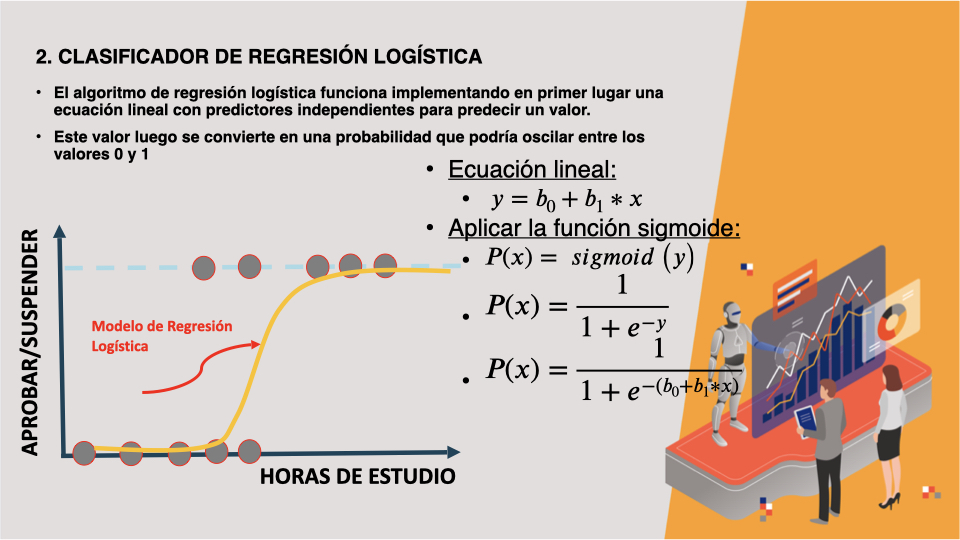

In [76]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.007.jpeg")

Con esto se puede ver que el algoritmo de regresión original, es modificado con una función sigmoide cuando los valores a predecir son una serie de categorias, entonces el modelo no regresa valores "si o no" sino la probabilidad de que pertenezca a dichas categorías. 

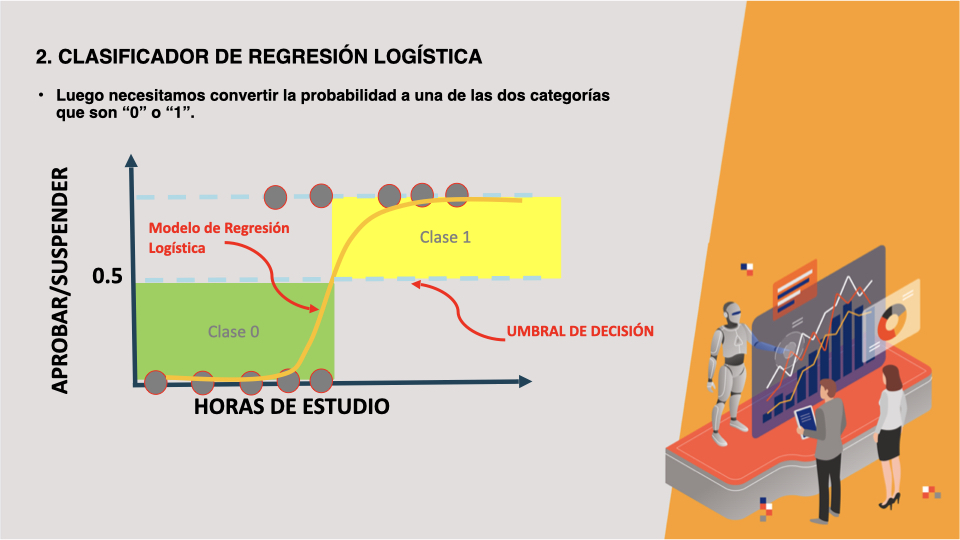

In [44]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.008.jpeg")

## CLASIFICADOR DE BOSQUES ALEATORIOS 

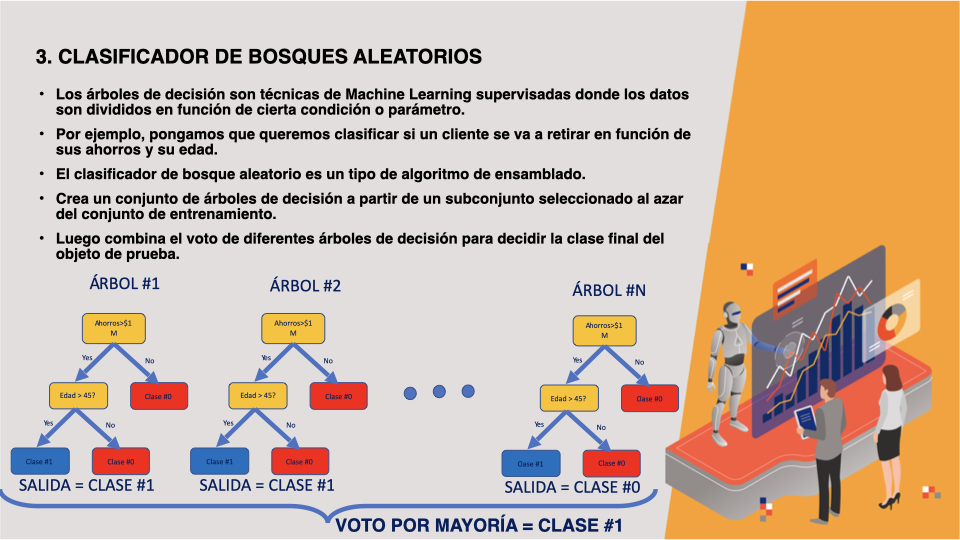

In [45]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.009.jpeg")

Los bosques aleatorios se basan en los arboles de desición. 

Ahora veremos como entender la evaluación de esos modelos de clasificación 
### ¿Cual de todos esos modelos es mejor?. 

La Matriz de confusión da un elemento perfecto par apoder evaluar que tanto se equivoca el modelo, las filas son las predicciones recordando que estamos en un proceso de clasificación binario y por eso hay clase positiva o negativa, 

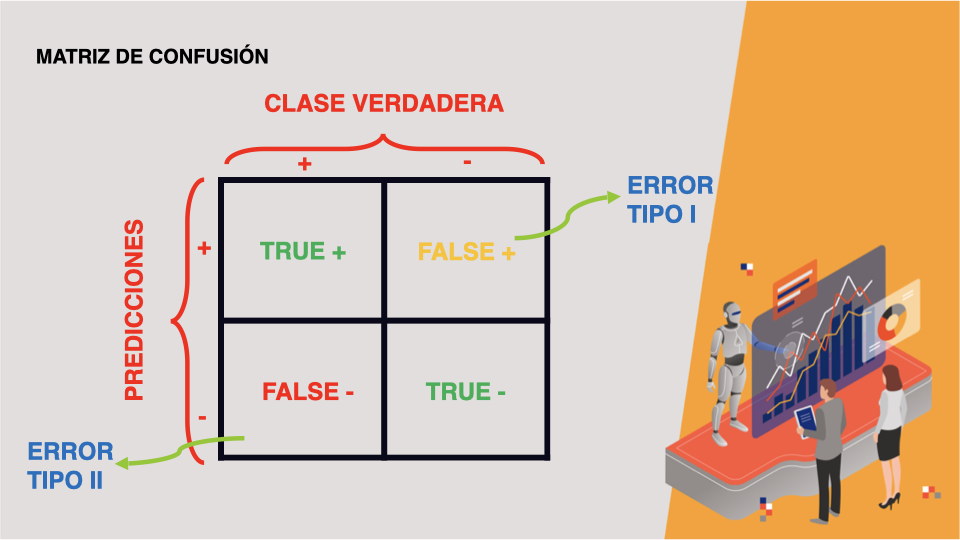

In [46]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.010.jpeg")

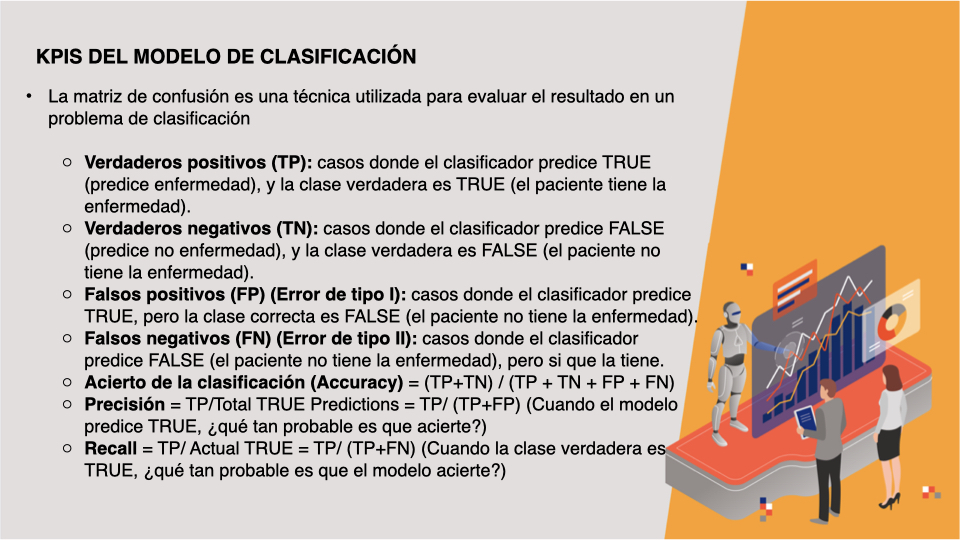

In [47]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.011.jpeg")

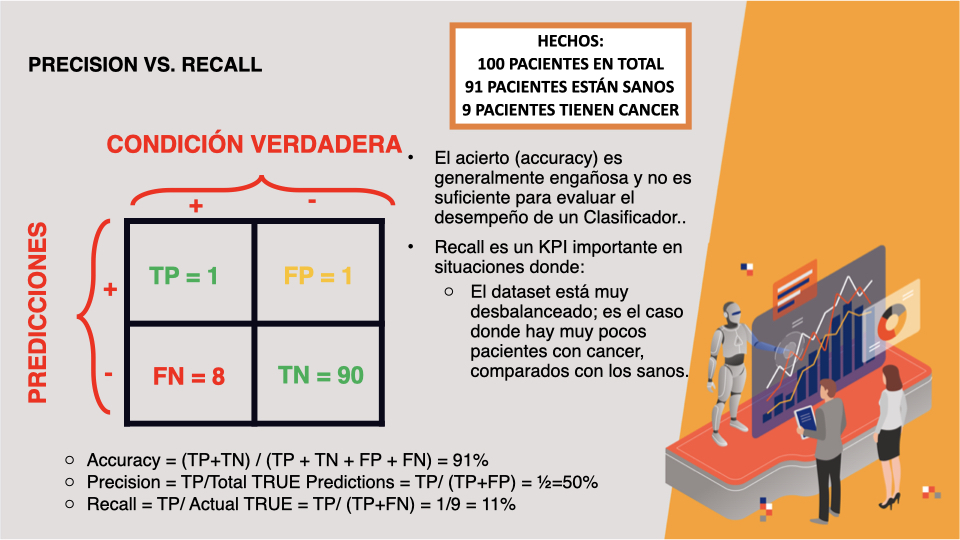

In [49]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.012.jpeg")

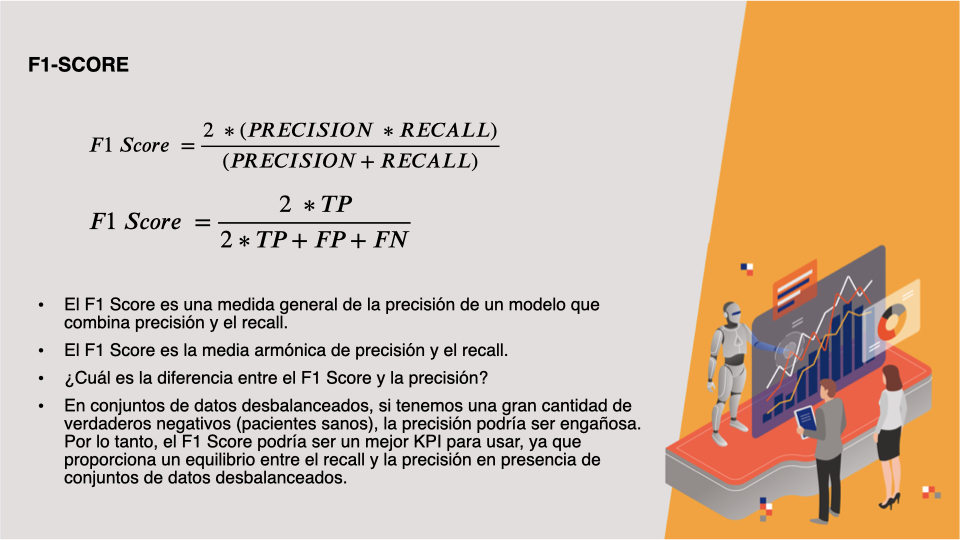

In [50]:
Image(filename = "C:/Users/URIEL/Documents/CURSO PYTHON/DATA SCIENCE APLICADO A NEGOCIOS ( 6 CASOS REALES)/HumanResources_slides/HumanResources_slides/HumanResources_slides.013.jpeg")

# CONTRUIR Y ENTRENAR UN CLASIFICADOR BASADO EN REGRESIÓN LOGÍSTICA

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#dividir el conjunto de datos 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) #25% de datos para entrenamiento y el otro 
#25 para la validación.

In [79]:
(x_train.shape, y_train.shape) #conjunto para la fase de entrenamiento. 

((1102, 50), (1102,))

In [80]:
x_test.shape, y_test.shape #para la fase de testing, ver si el modelo se comporta bien o no. 

((368, 50), (368,))

Creamos el modelo de regresión logistica. 

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train) #esto solo crea el modelo, con el conjunto de entrenamiento, con esto solo se ajustan los parametros. 

LogisticRegression()

In [82]:
#si queremos hacer una predicción, 
#con el model predict, le pasamos datos que no han sido utilizados, con datos que no se le han dado al modelo. 
y_pred = model.predict(x_test)

In [83]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Cuando sale un 1, nos quiere decir que el usuario en cuestión abandona la empresa, mientras los 0 no abandonarían la empresa. Sin embargo para poder comparar si este modelo da buenas predicciones y luego ver si es mejor que los otros, habrá que usar algunas KPi´s. 

In [84]:
from sklearn.metrics import confusion_matrix, classification_report 

In [85]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 86.1413043478261 %


Nuestro algoritmo tiene una tasa de acierto del 86.3% es decir que de cada 100 observaciones 86 de ellas son clasificadas correctamente por parte del modelo.\
Aunque tenemos que checar mas estadisticos, este no es sufuciente. 

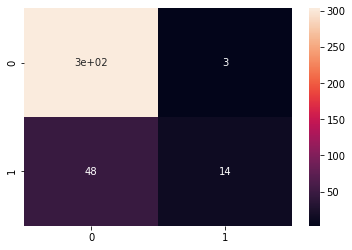

In [86]:
#Resultados en el conjunto de testing 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

* Nuestro modelo clasifica  negativamente mas de 3000 empleados que no van a abandonar la empresa y que realmente no lo hacen.
* Nos ha clasificado tambien correctos 12 empleados que si que abandonan la empresa y el modelo lo ha marcado asi. 

In [87]:
#estudiaremos la presición. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       306
           1       0.82      0.23      0.35        62

    accuracy                           0.86       368
   macro avg       0.84      0.61      0.64       368
weighted avg       0.86      0.86      0.83       368



* Nuestro modelo consigue una presición del 89% en la clase 0 y un 60% en la clase. 
* El recall es de 97% para la clase 0, pero solo de un 33% en la clase 1, esto seria bastante malo. 
* f1-score pasa practicamente lo mismo. 

# CONTRUIR Y ENTRENAR UN CLASIFICADOR UTILIZANDO RANDOM FOREST 

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model  = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
#las predicciones 
y_pred = model.predict(x_test)

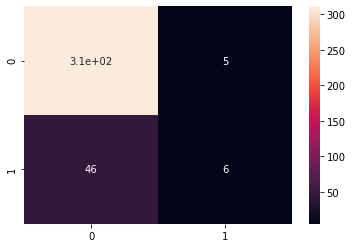

In [81]:
#queremos evaluar que tan bueno es el resultado. 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

* Los verdaderos negativos son 3100 y 6 los verdaderos positivos que captura el modelo. 

In [82]:
#reporte de clasificacion para ver si conseguimos mejores resultados que antes.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       316
           1       0.55      0.12      0.19        52

    accuracy                           0.86       368
   macro avg       0.71      0.55      0.56       368
weighted avg       0.83      0.86      0.82       368



* Para la presición tenemos un 87% para predecir la categoria 0. 
* El recall tenemos un 98% es decir solo nos hemos equivocado en 5 de todas las que hay, pero el otro esta mucho que desear, porque solo ha capturado el 12% que son los 6 sobre los 52 empleados que dejan la empresa, muy bajo este valor. 
* el f1_score pasa lo mismo. 

# CONSTRUIR Y ENTRENAR UN MODELO CLASIFICADOR CON REDES NEURONALES 

In [88]:
import tensorflow as tf

In [89]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))



In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
epochs_hist = model.fit(x_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4346 - accuracy: 0.8403
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3806 - accuracy: 0.8485
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8666
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3027 - accuracy: 0.8838
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2890 - accuracy: 0.8820
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.8993
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2956 - accuracy: 0.8857
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2282 - accuracy: 0.9074
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1888 - accuracy: 0.9220
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1496 - accuracy: 0.9465
Epoch 11/

In [93]:
y_pred = model.predict(x_test)
y_pred 

array([[2.82853842e-04],
       [1.25574074e-12],
       [2.01438866e-07],
       [2.85521661e-13],
       [4.44024801e-04],
       [3.69975384e-10],
       [1.75625086e-04],
       [2.10344791e-04],
       [3.30228204e-07],
       [1.08563299e-18],
       [4.72531302e-13],
       [1.19071436e-14],
       [1.17516518e-03],
       [5.43832779e-03],
       [6.60525634e-10],
       [2.69353390e-04],
       [1.99111878e-06],
       [2.50835552e-09],
       [1.06953991e-07],
       [1.14025963e-04],
       [2.80636527e-07],
       [9.99299645e-01],
       [4.13939517e-07],
       [3.90840707e-20],
       [1.64627589e-12],
       [7.22078161e-11],
       [1.08831645e-13],
       [1.65620731e-05],
       [2.40101372e-07],
       [9.77648961e-06],
       [9.99167562e-01],
       [2.57694001e-06],
       [5.72464884e-08],
       [1.05517923e-08],
       [5.36954614e-09],
       [1.97350979e-03],
       [5.20355592e-10],
       [6.62856298e-11],
       [1.74217712e-06],
       [2.69560405e-05],


* probabilidad de que el usuario abandone el trabajo, por ello hay probabilidades muy bajas o hay otras muy altas. 
* debemos de escoger un umbral de desición, para ecoger lo mas optimo. 

In [94]:
y_pred = (y_pred > 0.5)

In [95]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Podemos comparar los valores originales, con los True o False. 

Haremos una serie de graficos para ver a traves de las epoch de entrenamiento como ha ido disminuyendo la perdida y mejorando la presición. 

In [96]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

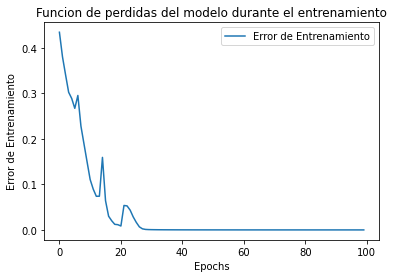

In [97]:
plt.plot(epochs_hist.history['loss'])
plt.title("Funcion de perdidas del modelo durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

Lo que vemos es como en el epoch aprox 18 ha incremento el error, pero despues empieza a bajar, cuantas mas veces se pasan nuestros datos por la red neuronal, mejor es esta y menor error produce en la clasificación. 

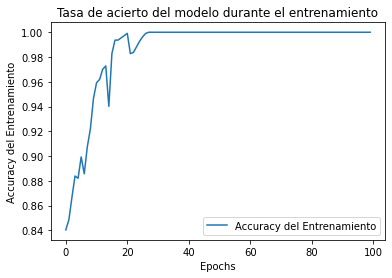

In [98]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de acierto del modelo durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy del Entrenamiento")
plt.legend(["Accuracy del Entrenamiento"])

Aumentamos el acierto en la prediccion cuando baja el error, empezando en 80%. 

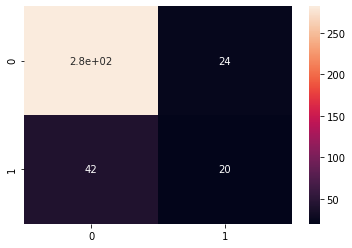

In [104]:
#usamos una matriz de confusion. 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       306
           1       0.45      0.32      0.38        62

    accuracy                           0.82       368
   macro avg       0.66      0.62      0.64       368
weighted avg       0.80      0.82      0.81       368



Podemos ver el modelo con redes neuronales, es un poco mas efectivo. 